<a href="https://colab.research.google.com/github/JulianDT/Analitica-de-datos/blob/master/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0-alpha0
# !pip install --upgrade tensorflow
# !pip install -U tensorflow-gpu==2.0.0 grpcio
!pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# para acceder a archivos desde google drive en google colaboratory
# acceso a google drive
from tensorflow import keras
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Se importa base de datos housing

housing = '1mFL0qC6ddvlYRXna8qQioBJwEMpPGl5X'
downloaded = drive.CreateFile({'id': housing})
downloaded.GetContentFile('housing.csv') 

#Se importa archivo de funciones para housing

Funciones = '1ii3ARI6AjA_utKIQ9aYtUkmf6iS_oXDw'
downloaded = drive.CreateFile({'id': Funciones})
downloaded.GetContentFile('Funciones.py') 

#Importo la función declarada en el archivo externo

from Funciones import pre_exploratorio_housing
#Con pandas leo la base de datos y pruebo que cargue adecuadamente
Xdata = pd.read_csv('housing.csv')
Xdata.info()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
from sklearn.model_selection import train_test_split

XtrainCompleto, Xtest = train_test_split(Xdata, test_size=0.3)
Xtrain, Xvalid = train_test_split(XtrainCompleto, test_size=0.3)

Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10113 entries, 4140 to 2802
Data columns (total 10 columns):
longitude             10113 non-null float64
latitude              10113 non-null float64
housing_median_age    10113 non-null float64
total_rooms           10113 non-null float64
total_bedrooms        10013 non-null float64
population            10113 non-null float64
households            10113 non-null float64
median_income         10113 non-null float64
median_house_value    10113 non-null float64
ocean_proximity       10113 non-null object
dtypes: float64(9), object(1)
memory usage: 869.1+ KB


In [0]:
#Aplico el preprocesamiento 

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder

#Separo columna de salida, categórigas y numericas
col_sal='median_house_value'
col_num=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms',
        'population','households','median_income']
col_cat=['ocean_proximity']

#Llamo función de pre_exploratorio para completar campos nulos
Xtrain, Ytrain= pre_exploratorio_housing(Xtrain,col_sal,col_num,col_cat,estra_num='median',estra_cat='most_frequent')

#Categorizo
codificador = OrdinalEncoder()
Xtrain['ocean_proximity'].value_counts()
Xtrain['ocean_proximity'] = codificador.fit_transform(Xtrain[['ocean_proximity']])



In [0]:
Xvalid, Yvalid= pre_exploratorio_housing(Xvalid,col_sal,col_num,col_cat,estra_num='median',estra_cat='most_frequent')

Xvalid['ocean_proximity'].value_counts()
Xvalid['ocean_proximity'] = codificador.fit_transform(Xvalid[['ocean_proximity']])

In [6]:
Xtrain.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4140,-118.17,34.12,30.0,3376.0,720.0,1990.0,725.0,3.7813,0.0
6543,-118.02,34.06,26.0,2929.0,970.0,3792.0,817.0,2.2577,0.0
105,-122.24,37.82,52.0,1509.0,225.0,674.0,244.0,4.9306,3.0
20179,-119.22,34.34,29.0,3128.0,672.0,1815.0,648.0,2.9821,4.0
6513,-118.03,34.06,36.0,1018.0,305.0,1307.0,292.0,2.1453,0.0


In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(200, input_shape=(9,), activation="relu"),
    keras .layers.Dense(50, activation="tanh"),
    keras.layers.Dense(1)
])

In [9]:
hidden1 = model.layers[1]
model.get_layer(hidden1.name) is hidden1

True

In [10]:
weights, biases = hidden1.get_weights()
weights

array([[-0.03454883,  0.05136788, -0.09042782, ...,  0.08953464,
        -0.07282602, -0.04106409],
       [-0.07058735, -0.05114021,  0.01406743, ..., -0.13205329,
         0.10738586,  0.07462257],
       [-0.09199931,  0.13048021,  0.05279049, ..., -0.09920017,
         0.1437733 , -0.06179541],
       ...,
       [-0.08934412, -0.07924773,  0.14242093, ..., -0.02419178,
         0.0088561 ,  0.13085087],
       [ 0.02623561,  0.14713164, -0.11581719, ...,  0.02301088,
         0.04163383, -0.13292564],
       [ 0.12721942, -0.11754793,  0.01586892, ...,  0.0868466 ,
        -0.04499597,  0.04043002]], dtype=float32)

In [11]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [0]:
model.compile(loss=keras.losses.mse,
              optimizer="sgd",
              metrics=[keras.losses.mae])

In [13]:
history = model.fit(Xtrain, Ytrain, epochs=10, validation_data=(Xvalid, Yvalid))

Train on 10113 samples, validate on 4335 samples
Epoch 1/10
10113/10113 [==============================] - 1s 80us/sample - loss: 14060267731.4791 - mean_absolute_error: 92557.9375 - val_loss: 13507109679.1843 - val_mean_absolute_error: 92925.7344
Epoch 2/10
10113/10113 [==============================] - 1s 62us/sample - loss: 13266540350.3071 - mean_absolute_error: 90895.0625 - val_loss: 13515136115.3919 - val_mean_absolute_error: 93097.8359
Epoch 3/10
10113/10113 [==============================] - 1s 62us/sample - loss: 13269372133.0406 - mean_absolute_error: 90884.2266 - val_loss: 13564983941.5806 - val_mean_absolute_error: 90739.8125
Epoch 4/10
10113/10113 [==============================] - 1s 63us/sample - loss: 13273046809.9468 - mean_absolute_error: 90912.5391 - val_loss: 14077968603.9179 - val_mean_absolute_error: 98187.6328
Epoch 5/10
10113/10113 [==============================] - 1s 63us/sample - loss: 13288976289.1739 - mean_absolute_error: 91118.0312 - val_loss: 13642221072

In [14]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 10,
 'metrics': ['loss',
  'mean_absolute_error',
  'val_loss',
  'val_mean_absolute_error'],
 'samples': 10113,
 'steps': None,
 'verbose': 0}

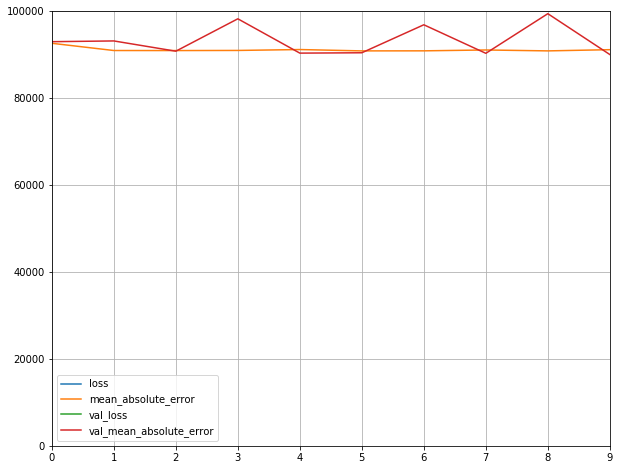

In [21]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.gca().set_ylim(0, 100000)
#save_fig("keras_learning_curves_plot")
plt.show()

In [0]:
Xtest, Ytest = pre_exploratorio_housing(Xtest,col_sal,col_num,col_cat,estra_num='median',estra_cat='most_frequent')


#Categorizo
codificador = OrdinalEncoder()
Xtest['ocean_proximity'].value_counts()
Xtest['ocean_proximity'] = codificador.fit_transform(Xtest[['ocean_proximity']])